In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [4]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1367s 8us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
y_train = y_train.reshape(-1, )
print(classes[9])
y_train[:5]

truck


array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [20]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [32]:
def plot_sample(X,y,index):
     plt.figure(figsize= (15,2) )
     plt.imshow(X[index])
     plt.xlabel(classes[y[index]])

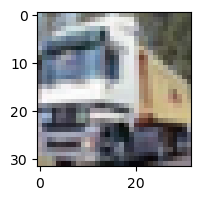

In [25]:
plt.figure(figsize= (15,2) )
plt.imshow(X_train[1])

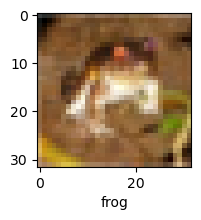

In [33]:
plot_sample(X_train, y_train, 0)

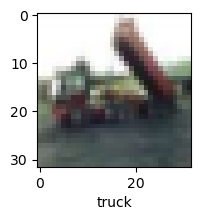

In [37]:
plot_sample(X_train, y_train, 2)

In [39]:
X_train = X_train/255
X_test = X_test/255

In [41]:
ann = models.Sequential ([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 70ms/step - accuracy: 0.3058 - loss: 1.9295
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.4197 - loss: 1.6460
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.4554 - loss: 1.5511
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4775 - loss: 1.4864
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4943 - loss: 1.4338


In [42]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4880 - loss: 1.4591


[1.4661388397216797, 0.4819999933242798]

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = ann.predict(X_test)
y_predict_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_predict_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.57      0.56      1000
           1       0.43      0.81      0.56      1000
           2       0.37      0.43      0.40      1000
           3       0.36      0.32      0.34      1000
           4       0.46      0.37      0.41      1000
           5       0.41      0.34      0.37      1000
           6       0.64      0.36      0.46      1000
           7       0.53      0.59      0.56      1000
           8       0.64      0.57      0.60      1000
           9       0.55      0.45      0.49      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [49]:
cnn = models.Sequential ([

    layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

C:\Users\surut\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.3844 - loss: 1.6931
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6101 - loss: 1.1146
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6674 - loss: 0.9583
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7002 - loss: 0.8576
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7280 - loss: 0.7828
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7457 - loss: 0.7318
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7637 - loss: 0.6833
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7817 - loss: 0.6280
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7954 - loss: 0.5907
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8085 - loss: 0.5536


In [50]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6954 - loss: 0.9098


[0.9264232516288757, 0.6984000205993652]

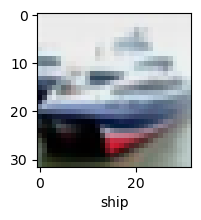

In [51]:
y_test = y_test.reshape(-1, )
plot_sample(X_test, y_test, 1)

In [ ]:
y_predict=cnn.predict(X_test)
